In [1]:
import math
import os
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import scipy
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt


In [41]:
N = 1000
t = np.arange(N)
trend = 0.5 * (t/30)**2
seasonality = 10 * np.sin(2 * np.pi * t/50) + 5 * np.sin(2 * np.pi * t/20)
noise = np.random.normal(0, 10, N)

time_series = trend + seasonality + noise

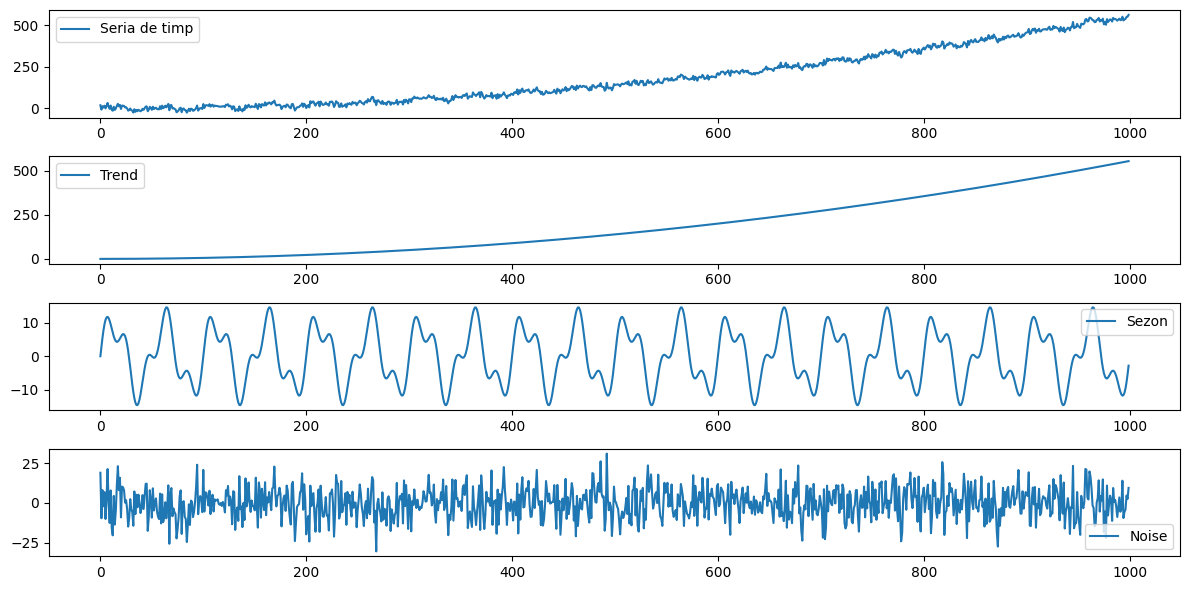

In [4]:
# a)
plt.figure(figsize=(12, 6))
plt.subplot(4, 1, 1)
plt.plot(t, time_series, label="Seria de timp")
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(t, trend, label="Trend")
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(t, seasonality, label="Sezon")
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(t, noise, label="Noise")
plt.legend()

plt.tight_layout()
plt.show()


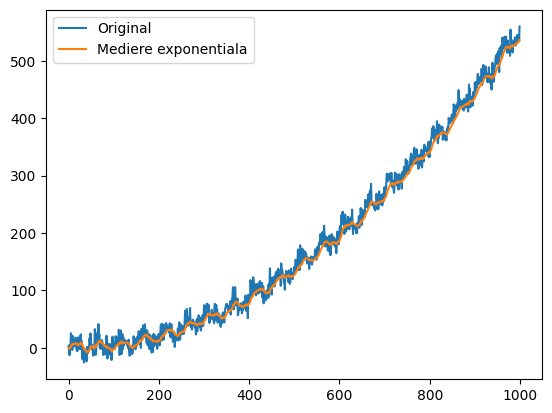

alpha= 0.0
error=  61235946.012715206
alpha= 0.01
error=  3130872.835329684
alpha= 0.02
error=  1028603.61996768
alpha= 0.03
error=  564884.6076954827
alpha= 0.04
error=  391787.68739114894
alpha= 0.05
error=  308219.23118586885
alpha= 0.06
error=  260970.63480399194
alpha= 0.07
error=  231177.87441203534
alpha= 0.08
error=  210829.20687178883
alpha= 0.09
error=  196072.52176218937
alpha= 0.1
error=  184876.5509189378
alpha= 0.11
error=  176088.4049903654
alpha= 0.12
error=  169011.94714332544
alpha= 0.13
error=  163203.54977667506
alpha= 0.14
error=  158366.72973260834
alpha= 0.15
error=  154294.89046647586
alpha= 0.16
error=  150838.77023497573
alpha= 0.17
error=  147887.1629414895
alpha= 0.18
error=  145355.05417335517
alpha= 0.19
error=  143176.0501142457
alpha= 0.2
error=  141297.37660098175
alpha= 0.21
error=  139676.4676429452
alpha= 0.22
error=  138278.56845498583
alpha= 0.23
error=  137075.0061453266
alpha= 0.24
error=  136041.91280622096
alpha= 0.25
error=  135159.26362903838

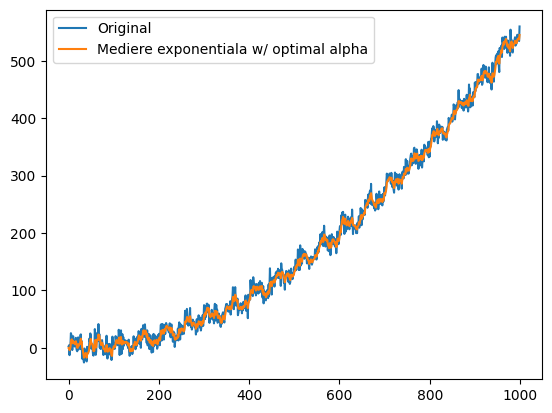

In [97]:
# b)
# model = SimpleExpSmoothing(time_series)
# fit1 = model.fit(smoothing_level=.2)
# fvalues = fit1.fittedvalues
# pred1 = fit1.forecast(1)

def smoothing(t, x, alpha):
    S = []
    for i, t_value in enumerate(t):
        suma = 0
        for j in range(t_value-1):
            suma += (((1 - alpha) ** j) * x[t_value - j] + ((1 - alpha) ** t_value) * x[0])
        S.append(alpha * suma) 
    return S


x_new = smoothing(t, time_series, 0.1)
plt.plot(t, time_series, label="Original")
plt.plot(t, x_new, label="Mediere exponentiala")
plt.legend()
plt.show()

def find_alpha(alpha, t, x):
    x_smoothed = smoothing(t, x, alpha)
    print("alpha=", alpha)
    error = 0
    for i in range(N-2):
        error += (x_smoothed[i] - x[i+1]) ** 2
    return error

alpha_values = np.arange(0.0, 1, 0.01)
errors = []

for alpha_value in alpha_values:
    error = find_alpha(alpha_value, t, time_series)
    print("error= ", error)
    errors.append(error)

optimal_alpha = alpha_values[np.argmin(errors)]

print("The optimal alpha is: ", optimal_alpha)
x_new = smoothing(t, time_series, optimal_alpha)
plt.plot(t, time_series, label="Original")
plt.plot(t, x_new, label="Mediere exponentiala w/ optimal alpha")
plt.legend()
plt.show()

In [102]:
from statsmodels.tsa.arima.model import ARIMA

q = 5 
ma_order = np.arange(1, q+1)
model = ARIMA(time_series, order=(0, ma_order.tolist()))

results = model.fit()

print(results.summary())

plt.plot(t, time_series, label="Original")
plt.plot(t, results.fittedvalues, label="MA Model")
plt.legend()
plt.show()

TypeError: '>' not supported between instances of 'list' and 'int'